In [25]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import seaborn as sns

# Frequency

In [42]:
df_fre = pd.read_csv('dane_pdf/frekfencja/frekfencja.csv', header=0)
#df_fre = df_fre.loc[df_fre['Rok']>2000,:]

In [43]:
df_par = df_fre.loc[df_fre['Wybory']=='Wybory parlamentarne',:].reset_index()
del df_par['index']
df_sam = df_fre.loc[df_fre['Wybory']=='Wybory samorządowe',:].reset_index()
del df_sam['index']
df_prez = df_fre.loc[df_fre['Wybory']=='Wybory prezydenckie',:].reset_index()
del df_prez['index']
df_pe = df_fre.loc[df_fre['Wybory']=='Wybory do Parlamentu Europejskiego',:].reset_index()
del df_pe['index']

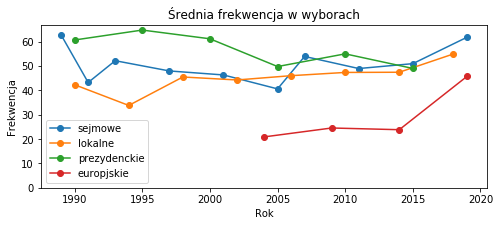

In [48]:
plt.figure(figsize=(8,3))
plt.plot(df_par['Rok'],df_par['Frekfencja'],'o-',label='sejmowe')
plt.plot(df_sam['Rok'],df_sam['Frekfencja'],'o-',label='lokalne')
plt.plot(df_prez['Rok'],df_prez['Frekfencja'],'o-',label='prezydenckie')
plt.plot(df_pe['Rok'],df_pe['Frekfencja'],'o-',label='europjskie')
plt.ylim(0)
plt.title('Średnia frekwencja w wyborach')
plt.xlabel('Rok')
plt.ylabel('Frekwencja')
plt.legend()
plt.savefig('dane_pdf/frekfencja/frekfencja_wybory.png',  bbox_inches='tight')

# Sondaże

In [49]:
pool_df = pd.read_csv('dane_pdf/sondaze/Pools_poland.csv', index_col=0, header=0)

In [50]:
pool_df = pool_df.fillna(0)
pool_df = pool_df.replace(['-'], 0)

In [51]:
for c in pool_df.columns:
    pool_df[c] = pd.to_numeric(pool_df[c])
    pool_df[c][:-1] = pool_df[c][:-1].apply(lambda x: x*pool_df[c][-1]/100 if pool_df[c][-1] > 0 else x)

/home/marek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


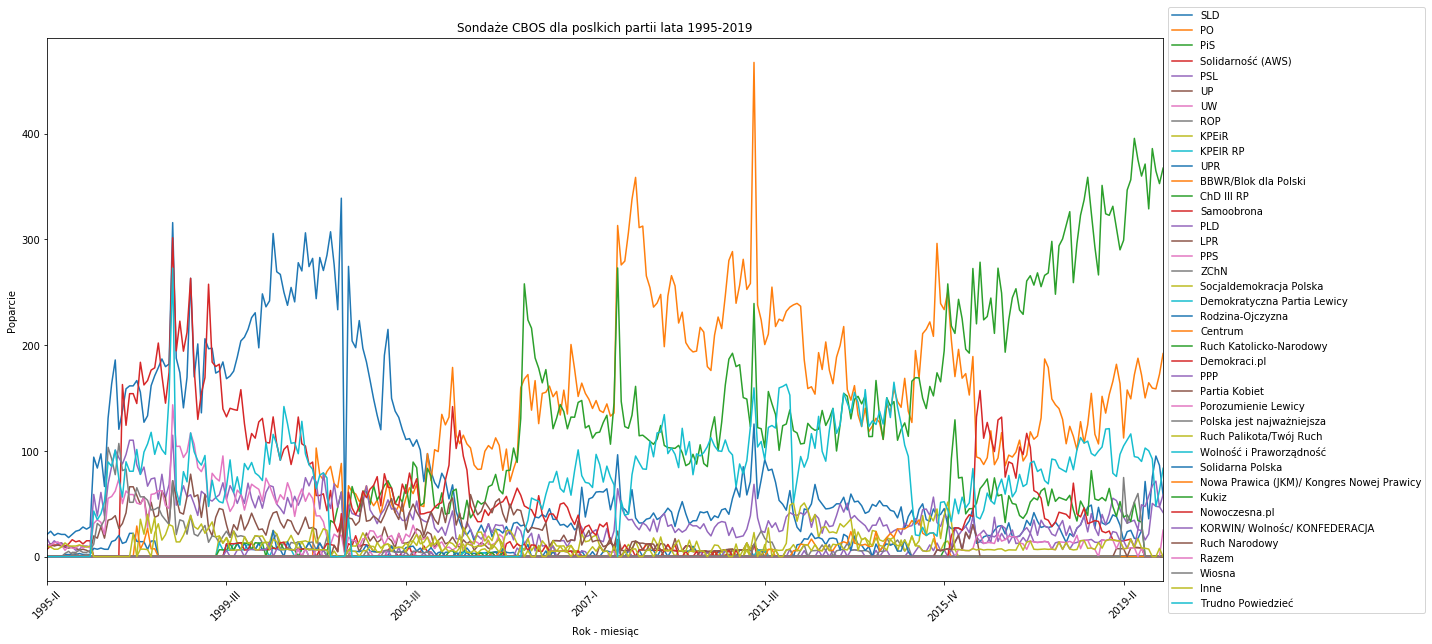

In [61]:
pool_df.iloc[:-1,:].T.plot(figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xticks(rotation=45)
plt.title('Sondaże CBOS dla poslkich partii lata 1995-2019')
plt.xlabel('Rok - miesiąc')
plt.ylabel('Poparcie')
plt.savefig('dane_pdf/sondaze/sondaze_dirty.png',  bbox_inches='tight')

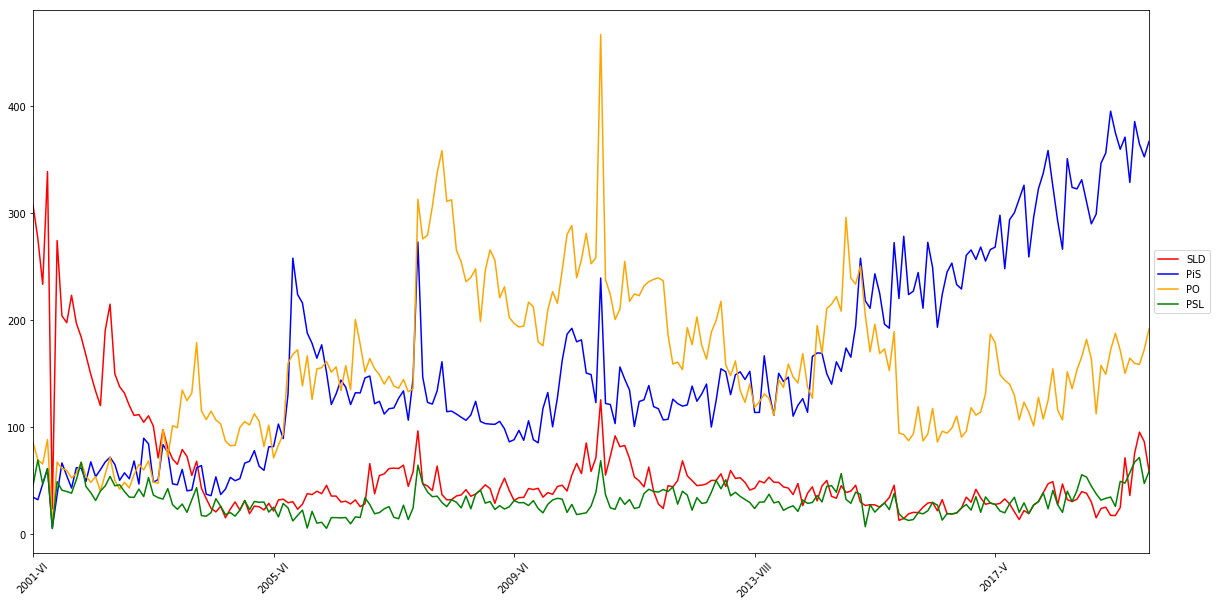

In [52]:
color=['r','b','orange','g']
pool_df.loc[:,pool_df.loc['PiS']>0].T[['SLD','PiS','PO','PSL']].plot(color=color, figsize=(20,10))
plt.legend(['SLD','PiS','PO','PSL'], loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xticks(rotation=45)
plt.show()